# Student Dropout: An Examination of Student Characteristics and Economic Indicators

This project aims to predict student dropout and academic success based on various student characteristics and academic indicators.

![](https://i.ytimg.com/vi/S5NKx_5EW-w/maxresdefault.jpg)

### Data: 

The dataset used in this project comes from Kaggle, https://www.kaggle.com/datasets/naveenkumar20bps1137/predict-students-dropout-and-academic-success?select=dataset.csv, detailing various aspects of a student's personal background, academic performance, economic indicators, and more. To be more specific, the dataset includes variables such as marital status, nationality, parents' qualifications and occupations, debtor status, age at enrollment, curricular units performance, among others. Additionally, it includes some economic indicators such as unemployment rate, inflation rate, and GDP, which provides a broader context to the student's situation.


### Motivation: 

As a international student, I am deeply intrigued by how these diverse backgrounds may shape the academic outcomes of students in a broad sense. In addition to discerning any potential correlations between these student characteristics and dropout rates, I am also keen on creating a predictive model for students' academic success.

### Research Questions: 

- Does our data confirm traditional beliefs about the features that impact on students' academic success?
- What shared traits can we identify among students who tend to drop out of universities?
- Does any overarching societal trait such as GDP and inflation rate significantly influence a student's academic success?
- Beyond these seemingly independent factors, it's important to consider their potential multicollinearity. Are they interrelated, affecting our analysis? 



## Install Required Packages

In [34]:
# # install packages
!pip install kaggle
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly

## Setup API env

In [35]:
import os
#specify credentials
os.environ['KAGGLE_USERNAME'] = "constantinewang"
os.environ['KAGGLE_KEY'] = "965a8311015c3039e89e307e4cae5ee6"

## Import data and summary statistics

In [36]:
import zipfile
import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the API
api = KaggleApi()
api.authenticate()

#download dataset
api.dataset_download_files('naveenkumar20bps1137/predict-students-dropout-and-academic-success')
with zipfile.ZipFile('predict-students-dropout-and-academic-success.zip', 'r') as zip_ref:
    zip_ref.extractall()

#load dataset into a pandas DataFrame
df = pd.read_csv('dataset.csv')

## Explore the dataset: Print out summary 

In [37]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Explore the dataset: Exploratory visualizations

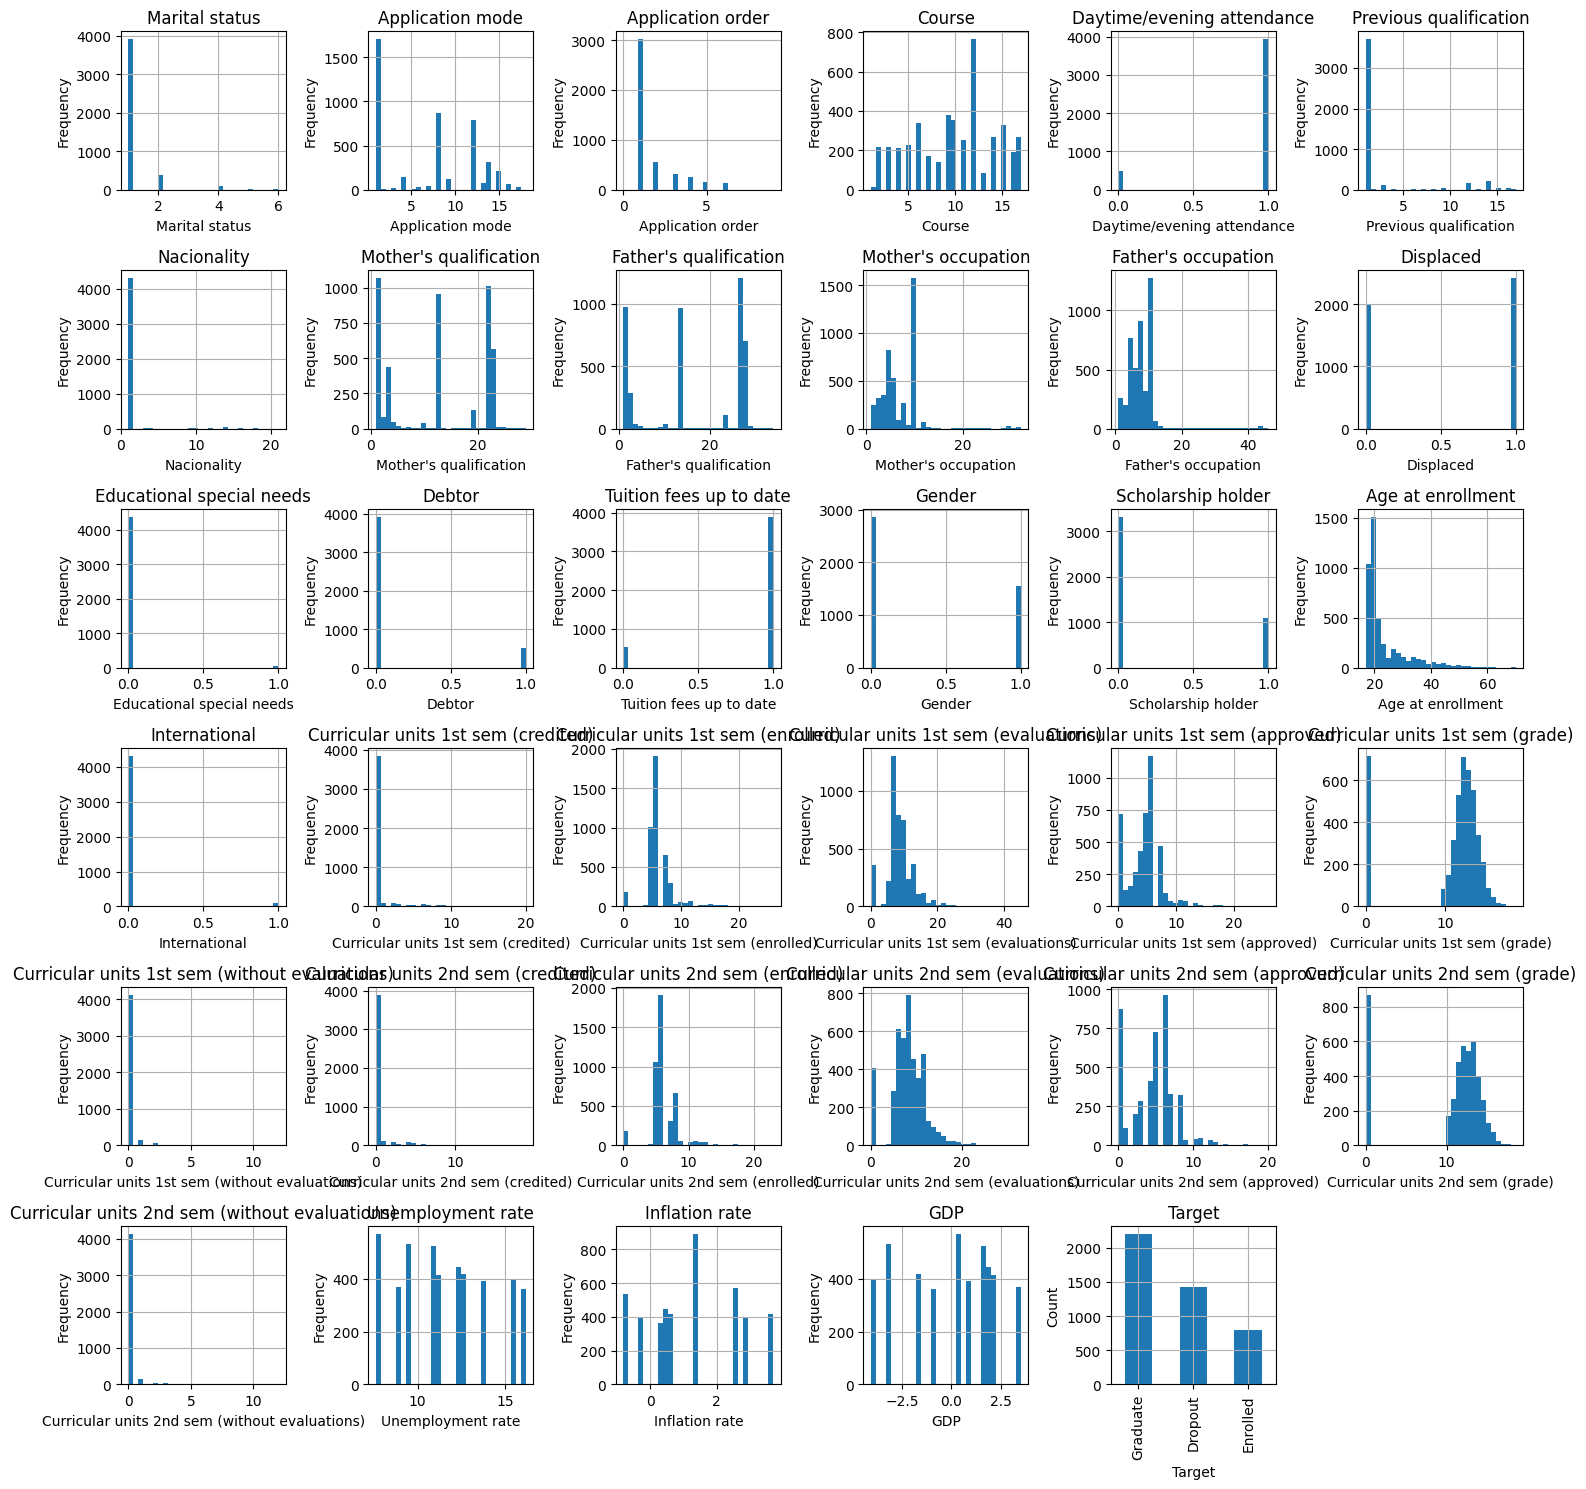

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#total numbers
num_of_cols = df.shape[1]

#make alignment&size
subplot_rows = int(np.ceil(np.sqrt(num_of_cols)))
subplot_cols = int(np.ceil(num_of_cols / subplot_rows))
plt.figure(figsize=(15, 15))

for idx, column in enumerate(df.columns, start=1):
    plt.subplot(subplot_rows, subplot_cols, idx)
    
    #for columns that are numeric type, we create histogram
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column].hist(bins=30)
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        
    #for columns that are categorical type, we create bar plot
    else:
        df[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.grid(True)

plt.tight_layout()
plt.show()


## Clean&Process the data: drop null value

We can see that the Target column has not been encoded yet. Then, we want to check if there is any null/missing value.

Good news! we do not have any null value.

In [39]:
#check if there are null/missing values
is_null = df.isnull().sum()
print(is_null)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

## Clean&Process the data: remove unrelated values

Because we want to research on if a student either drop out or graduate, there is no need to include "enrolled" student.

In [40]:
df = df[df['Target'] != 'Enrolled']
print(df['Target'].unique())
target_mapping = {"Dropout": 0, "Graduate": 1}
df['Target_encoded'] = df['Target'].map(target_mapping)

['Dropout' 'Graduate']


## Clean&Process the data: remove outliers

In this instance, our aim is to exclude students who exhibit atypical enrollment ages, as they are not representative of the overall student population.

In [41]:
# cut off outliers that have a unusual age
numerical_cols = ['Age at enrollment',]
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    #only keep rows in the dataframe that do not contain outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

#check the new min max
print("Min Age: ", df['Age at enrollment'].min())
print("Max Age: ", df['Age at enrollment'].max())

Min Age:  17
Max Age:  34


## Answer to Q1: Investigating Traditionally Believed Predictors

In this section, we aim to examine some traditionally considered factors influencing student outcomes. By visualizing these elements, we can empirically test our pre-existing assumptions about the key drivers of student success or failure.

### Assumption 1:  Influence of Age at Enrollment on Academic Success

It is traditionally believed that age plays a important role in shaping a student's academic success. Older students are often perceived to have a greater life experience and motivation, which could translate into academic proficiency. However, they might also have more responsibilities, such as employment or family.

On the other hand, younger students, while potentially less experienced in life, might be more attuned to academic routines, which could foster their academic success.

Our data visualization, however, unveils a more nuanced picture. It clearly suggests that students who enroll at a younger age have a notably higher probability of successfully graduating. This correlation between lower enrollment age and higher graduation rates is especially strong up to the age of 26.

Post 26, we notice a smooth decrease in the rate of academic drop-off. This could potentially be attributed to increased stability in job and family commitments, allowing individuals to devote more time and effort towards their education.

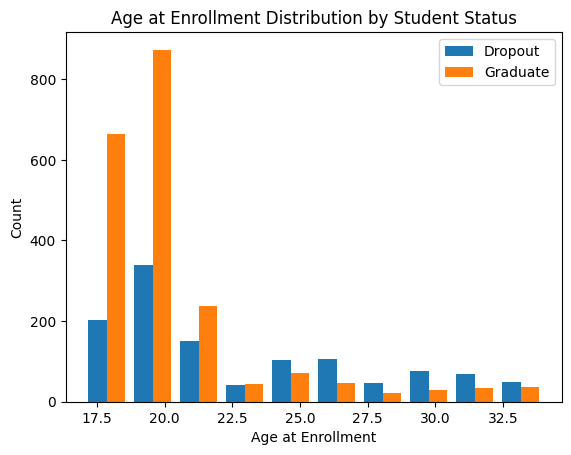

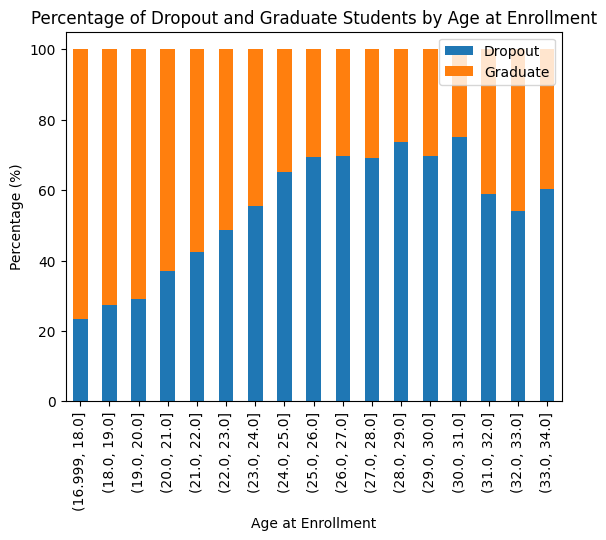

In [42]:
import matplotlib.pyplot as plt

#Histogram of Age at enrollment with Student Status
dropout_age = df[df['Target'] == 'Dropout']['Age at enrollment']
graduate_age = df[df['Target'] == 'Graduate']['Age at enrollment']
plt.hist([dropout_age, graduate_age], label=['Dropout', 'Graduate'])
plt.xlabel('Age at Enrollment')
plt.ylabel('Count')
plt.title('Age at Enrollment Distribution by Student Status')
plt.legend()
plt.show()


#create bins for ages
bins = range(df['Age at enrollment'].min(), df['Age at enrollment'].max()+1,1)
# create a DataFrame for dropouts
dropout_df = df[df['Target'] == 'Dropout']['Age at enrollment'].value_counts(bins=bins, sort=False).rename('Dropout')
dropout_df /= df['Age at enrollment'].value_counts(bins=bins, sort=False)
dropout_df *= 100
# percentage

#graduates
graduate_df = df[df['Target'] == 'Graduate']['Age at enrollment'].value_counts(bins=bins, sort=False).rename('Graduate')
graduate_df /= df['Age at enrollment'].value_counts(bins=bins, sort=False)
graduate_df *= 100

# combine them into a single DataFrame
percentage_df = pd.concat([dropout_df, graduate_df], axis=1)

#create a bar plot
percentage_df.plot(kind='bar', stacked=True)
plt.xlabel('Age at Enrollment')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Dropout and Graduate Students by Age at Enrollment')
plt.legend()
plt.show()





### Assumption 2: The Impact of First Semester Grades on Student Status

It's commonly accepted that early academic performance, as indicated by first semester grades, significantly influences a student's likelihood of successful graduation. This idea suggests that a strong start can create a strong foundation for success in studies.

The box plot visualization affirms this assumption, indicating that higher first semester grades significantly boost the likelihood of successful graduation. This highlights the importance of supporting students early in their academic journey, aiding those who may struggle initially, thereby enhancing their overall chances of successful graduation.

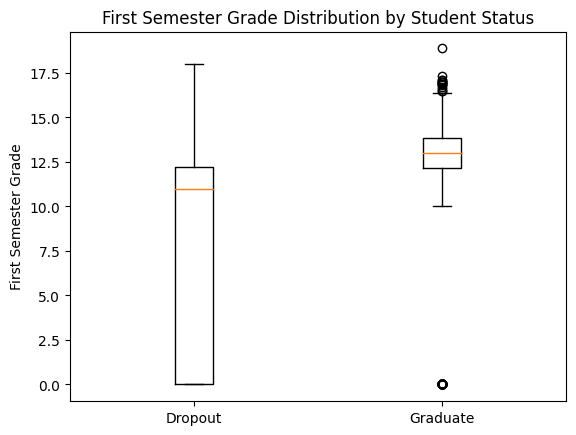

In [43]:
#Boxplot of 'Curricular units 1st sem (grade)' divided by Student Status
dropout_grade = df[df['Target']=='Dropout']['Curricular units 1st sem (grade)']
graduate_grade = df[df['Target']=='Graduate']['Curricular units 1st sem (grade)']
plt.boxplot([dropout_grade, graduate_grade], labels=['Dropout', 'Graduate'])
plt.title('First Semester Grade Distribution by Student Status')
plt.ylabel('First Semester Grade')
plt.show()

### Assumption 3: Influence of Class Scheduling on Student Success

There's a prevalent belief that the timing of classes can affect a student's academic success. This belief suggests that daytime students, being potentially have a greater efficiency in learning.

The pie chart visualization confirms this assumption, showing that students attending daytime classes indeed have a significantly higher probability of successful graduation. This underscores the importance of time scheduling in the academic success of students and warrants further investigation into the specific biological and psychological factors that contribute to this phenomenon.

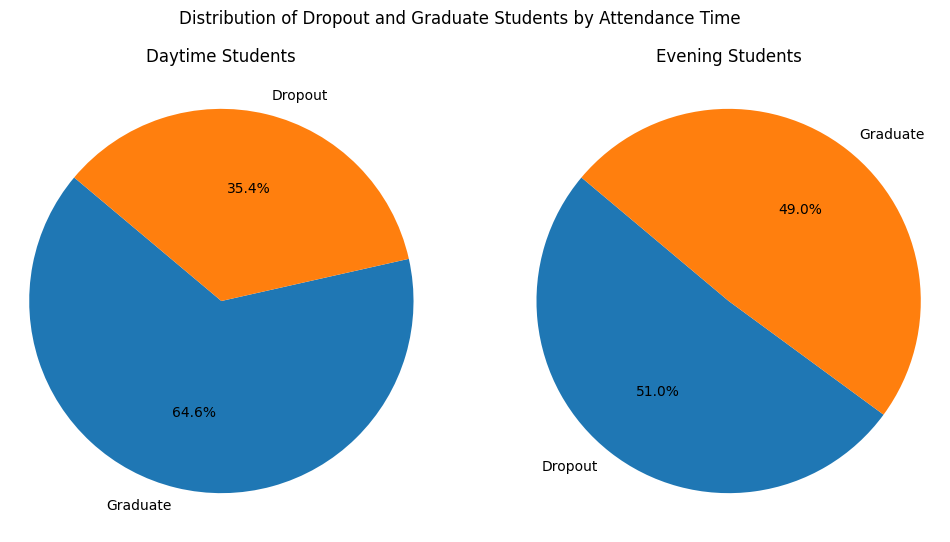

In [44]:
df_copy=df.copy()
daytime_counts = df_copy[df_copy['Daytime/evening attendance'] == 1]['Target'].value_counts()
evening_counts = df_copy[df_copy['Daytime/evening attendance'] == 0]['Target'].value_counts()

#pie chart for Daytime students
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(daytime_counts, labels = daytime_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Daytime Students')

#pie chart for Evening students
plt.subplot(1,2,2)
plt.pie(evening_counts, labels = evening_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Evening Students')

plt.suptitle('Distribution of Dropout and Graduate Students by Attendance Time')
plt.show()

### Assumption 4: Impact of Marital Status on Academic Success

There's a common thought that a student's marital status might change their success in school. Single students might have more time for studying since they don't have a spouse or family responsibilities.

Our data shows an interesting trend. The first chart shows that single students graduate more often. But when we look at the second chart, we see that there are a lot more single students than married ones in our data, which means our dataset is imbalanced. This imbalance suggests that we can't draw a concrete conclusion about the impact of marital status on graduation rates as the data might be skewed.

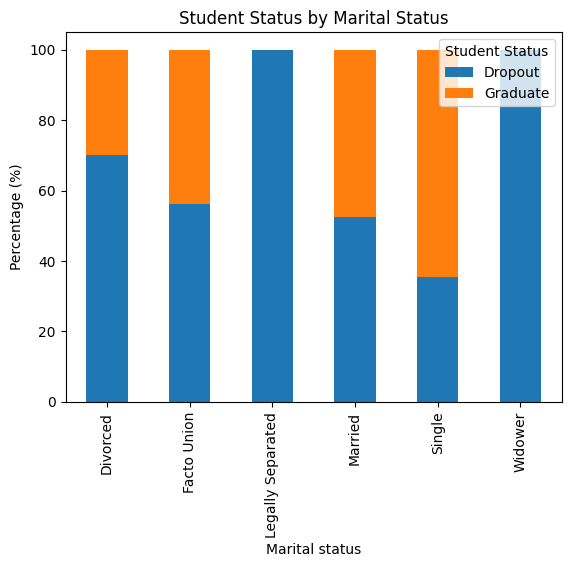

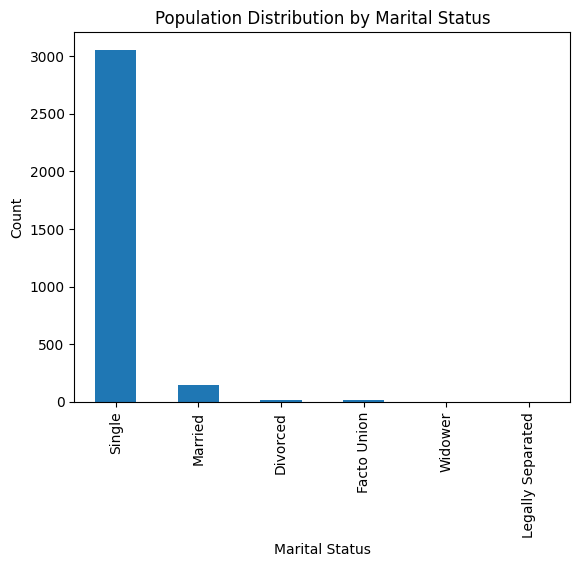

In [45]:
#map the marital status
def map_marital_status(status):
    if status == 1:
        return 'Single'
    elif status == 2:
        return 'Married'
    elif status == 3:
        return 'Widower'
    elif status == 4:
        return 'Divorced'
    elif status == 5:
        return 'Facto Union'
    elif status == 6:
        return 'Legally Separated'
    else:
        return 'Other'

#make groups
df_copy['Marital status'] = df_copy['Marital status'].apply(map_marital_status)
grouped_df_marital = df_copy.groupby(['Marital status', 'Target']).size().unstack()
grouped_df_marital = grouped_df_marital.div(grouped_df_marital.sum(axis=1), axis=0)*100



#create a bar plot
grouped_df_marital.plot(kind='bar', stacked=True)
plt.title('Student Status by Marital Status')
plt.xlabel('Marital status')
plt.ylabel('Percentage (%)')
plt.legend(title='Student Status')
plt.show()

#first let's visualize the number of people of each marital status
df_copy['Marital status'].value_counts().plot(kind='bar')
plt.title('Population Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



## Answer to Q2: Assessing Correlations Between Target and Other Variables

Having examined some conventionally acknowledged predictors of student outcomes, we will now visualize all the variables in our dataset. Our goal is to evaluate the correlation between each variable and the student status. This comprehensive correlation assessment will help us identify the most significant determinants of a student's academic trajectory.

### Cleaning&Processing: Exclusion of Unordered Columns

Certain columns in our dataset represent unordered categorical variables. For instance, the fourth visualization in the previous section demonstrates an unordered category that lacks any logical order or hierarchy. In order to enhance the meaningfulness of our correlation visualization, we need to focus on columns that contain ordered categories or numerical values. Therefore, we will process our dataset to retain only these relevant columns.

In [46]:
df_copy = df.copy()
#columns to drop from exploring of dataset
columns_to_drop = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 
                   'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", 
                   "Mother's occupation", "Father's occupation"]
df_copy = df_copy.drop(columns=columns_to_drop)

### Visualization: use interactive lib

Using Plotly, we can make a visually appealing and informative visualization. It provides ample space for displaying the precise values of the correlation coefficients, as users can hover over each bar to examine the values in detail. 


/tmp/ipykernel_1044/3793878396.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



/tmp/ipykernel_1044/3793878396.py:19: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



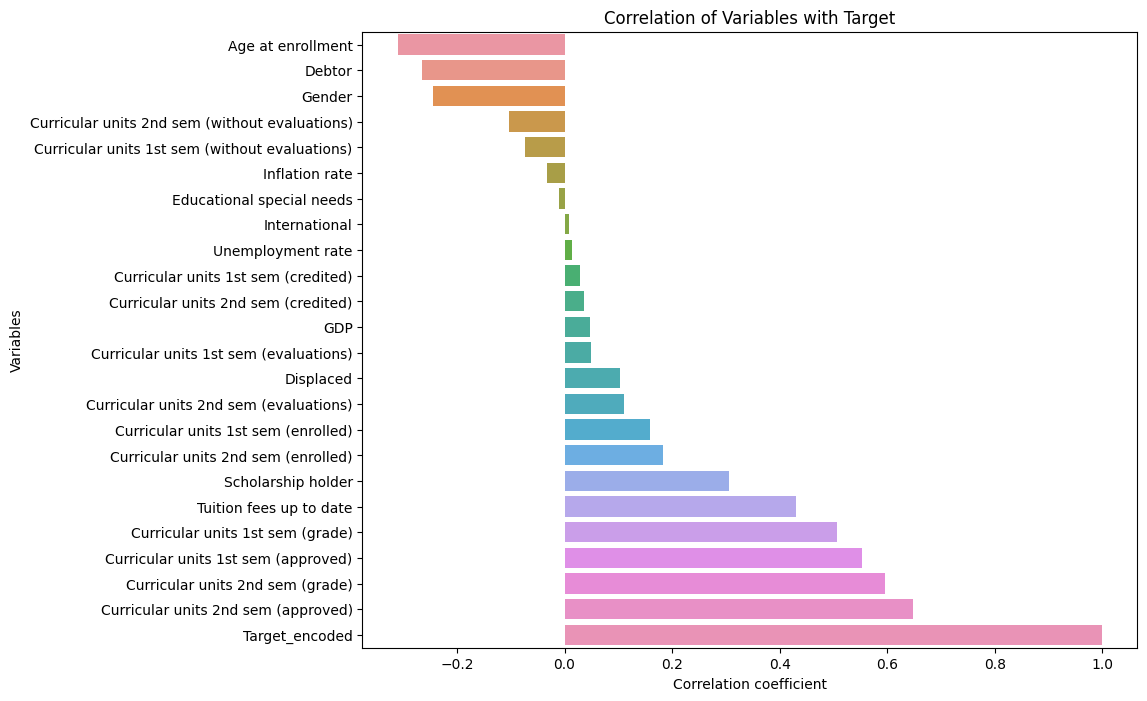

In [47]:
# This works in CKHUB, but may due to some reason not work in the webpage (compatibility of plotly lib in binder)
# corr = df_copy.corr()
# import plotly.graph_objects as go

# #create a bar chart
# corr_target = corr['Target_encoded'].sort_values()
# fig = go.Figure(data=go.Bar(x=corr_target.index, y=corr_target.values))
# fig.update_layout(title_text='Correlation of Variables with Target', 
#                   xaxis_title='Variables', 
#                   yaxis_title='Correlation coefficient',
#                   autosize=False,
#                   width=800,
#                   height=800,
#                   margin=dict(l=50, r=50, b=100, t=100, pad=4))
# fig.show()

#Therefore, here is the seaborn version
import seaborn as sns
corr_target = df_copy.corr()['Target_encoded'].sort_values()
plt.figure(figsize=(10, 8)) # you can adjust the size as needed
sns.barplot(x=corr_target.values, y=corr_target.index)
plt.xlabel('Correlation coefficient')
plt.ylabel('Variables')
plt.title('Correlation of Variables with Target')

plt.show()



### Analysis of correlations

We use the following standard cutoffs to categorize the strength of correlations: a strong correlation is indicated by a value greater than 0.5, a medium correlation falls between 0.25 and 0.5, and a weak correlation is represented by a value less than 0.25.

Based on these criteria, we observe a number of correlations that align with traditionally held beliefs. For instance, the medium negative correlation between 'Age at enrollment' and the target (-0.3104668) suggests that older students may be more likely to drop out. This supports our earlier assumptions and aligns with our previous data visualization.

For positive correlations, there is are strong correlations between 'Curricular units (approved/graded)' for both semesters and student status. The stronger values (0.5538, 0.5963, 0.6484) indicate a higher likelihood of graduation for students with more credited units or higher grades. Furthermore, the medium positive correlation (0.3053657) for 'Scholarship holders' suggests these students, often exhibiting superior academic performance, are more likely to graduate.

In addition to these familiar correlations, our analysis uncovers some newer factors tied to student dropout rates. 
- 'Debtor' demonstrates a medium negative correlation (-0.26465921) with the target, hinting at a higher dropout likelihood for students in debt. Conversely, 
- 'Tuition fees up to date' shows a medium positive correlation (0.43003638), suggesting students maintaining current tuition payments are more likely to graduate.
- 'Gender' has a negative medium strength correlation (-0.24559089), implying that male students may be more likely to drop out than famale students

While these interpretations are very meaningful, it's important to emphasize that **correlation does not mean causation**. Thorough investigation is required to fully comprehend these relationships and identify the root causes. For instance, the higher dropout rates among older students or those in debt could be attributed to financial constraints, familial obligations, and a bunch of other factors.

One interesting finding is that, as an international student, I also don't find a significant correlation between a student being international and the dropout rate.

## Answer to Q3: Impacts of social and economic indicators like GDP and inflation rate

Upon visualizing the correlation heatmap, we find no substantial linkage between social and economic factors (Unemployment rate, GDP, Inflation rate) and the various academic attributes of students.

To gain a more complete understanding, we'd need to examine trends over a more extended period and possibly incorporate other data such as government education spending, socio-economic status of students' families, and broader societal factors.

Hence, while our current analysis does not indicate a substantial linkage, we cannot completely rule out the potential influences of social and economic conditions on student academic performance. Further research using a more comprehensive dataset covering longer time frames is recommended to explore these potential impacts more thoroughly.

/tmp/ipykernel_1044/48788898.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



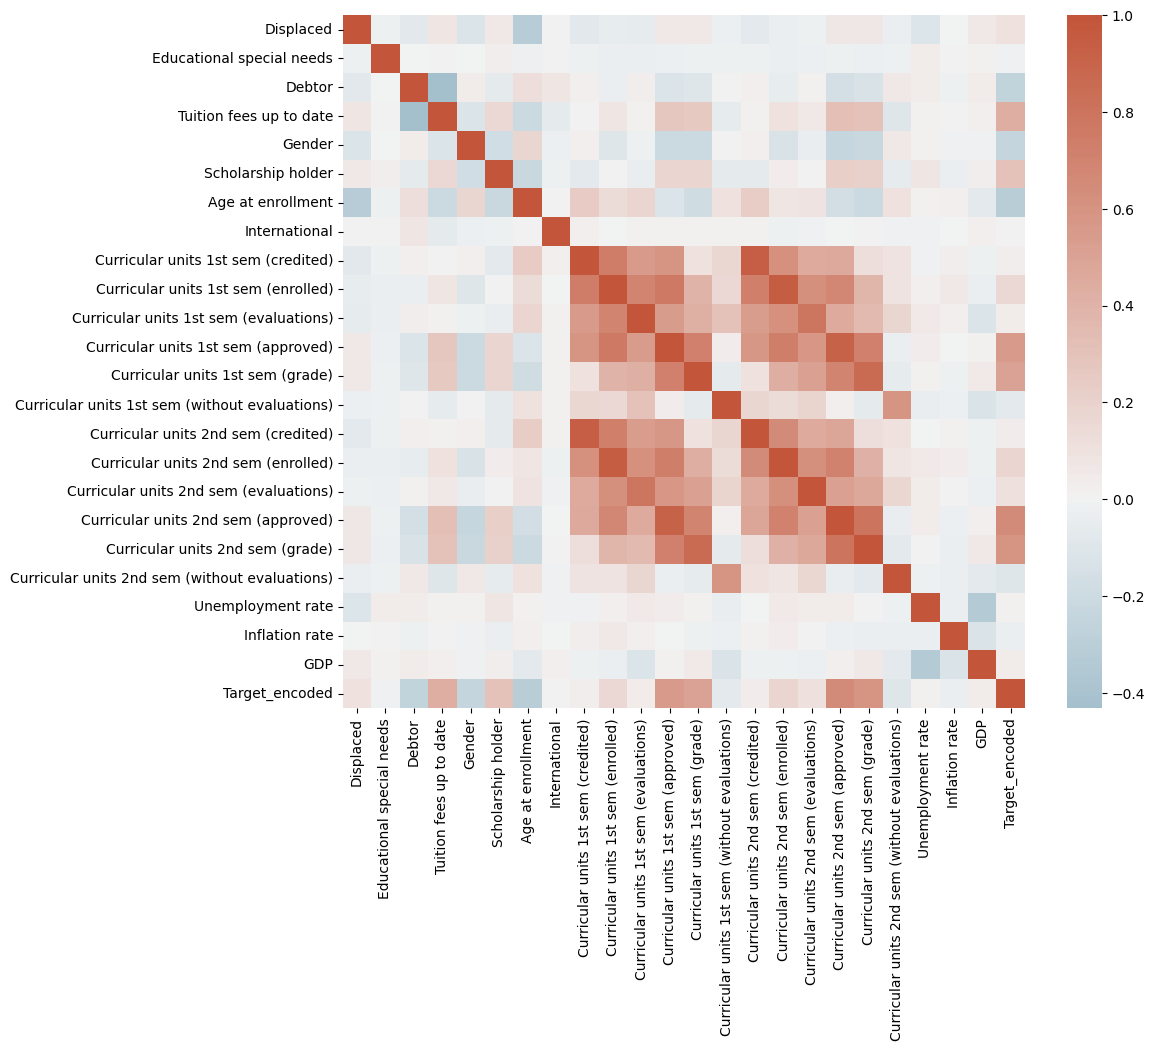

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_copy.corr()

f, ax = plt.subplots(figsize=(11, 9))
#create a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0)
plt.show()

## Answer to Q4:  discover multicollinearity of independent variables

In our quest to understand student academic outcomes, we're not just looking at individual factors but the intricate web of interactions among them. Moreover, exploring correlations among variables could help us to identify potential colinearity of two or more independent variables in a regression model are highly correlated. 

We will employ the correlation heatmap displayed above to detect potential multicollinearity among the independent variables.

### Analysis 1: Displaced and Age at enrollment

The negative correlation of -0.323 between 'Displaced' and 'Age at enrollment' indicates a moderate, inverse relationship: younger students are more likely to be displaced, while older students are less so. This may be due to factors like economic instability or housing insecurity among younger students, or potentially greater stability or preparedness among older students returning to education.

However, without further research, it's uncertain if this correlation implies a causal link or simply reflects underlying variables. Understanding such relationships can help shape effective institutional support, especially for vulnerable, younger students. The ripple effect of these findings might also extend to areas like mental health, highlighting the need for better approaches.

In [49]:
correlation = df['Displaced'].corr(df['Age at enrollment'])

print(f"The correlation between 'Displaced' and 'Age at enrollment' is: {correlation}")

The correlation between 'Displaced' and 'Age at enrollment' is: -0.3237735997464465


### Analysis 2: Debtor and Tuition fees up to date

The negative correlation of -0.431 between 'Debtor' and 'Tuition fees up to date' indicates a moderately strong inverse relationship. Essentially, if a student is a debtor, it's less likely their tuition fees are up to date, and vice versa. This makes intuitive sense, as being a debtor often implies facing financial hardships, which could hinder timely tuition payments. The presence of such colinearity indicates that these factors may not operate independently, but instead might exert a mutual influence. 

In [50]:
correlation = df['Debtor'].corr(df['Tuition fees up to date'])

print(f"The correlation between 'Debtor' and 'Tuition fees up to date' is: {correlation}")

The correlation between 'Debtor' and 'Tuition fees up to date' is: -0.43166077929905516


## Discussion

Our analysis has yielded valuable insights into the various factors that can significantly impact student academic success. We explored several common assumptions and found that some were supported by empirical evidence.

Additionally, through a comprehensive assessment of dataset, we uncovered new factors that influence student outcome. Interestingly, some findings confirmed our initial assumptions, such as the negative correlation between the age at enrollment and student graduation, as well as the positive correlation between credited units and student success.

We also observed the importance of financial factors, such as student debt and timely tuition fee payments, in relation to student outcomes. However, it is essential to note that correlations do not imply causation, and further research is necessary to thoroughly understand these relationships.

Regarding societal and economic indicators like GDP and unemployment rates, we did not find substantial correlations with student academic success. Nonetheless, it is important to consider that these factors may still have potential influences that requires more comprehensive research with larger datasets and longer timeframes.

Additionally, our analysis of potential multicollinearity among variables revealed intriguing correlations. For instance, the inverse relationship between 'Displaced' and 'Age at enrollment', and the negative correlation between 'Debtor' and 'Tuition fees up to date', suggests possible mutual influences.

In conclusion, our analysis demonstrates the complexity of predicting student academic outcome. A multitude of factors, including personal circumstances, academic performance, financial situation, and potentially broader societal factors, all interact in intricate ways to influence student academic success.